# ``pdvega``: Pandas Plotting API to Vega-Lite

[``pdvega``](http://github.com/jakevdp/pdvega) is a package that extends the pandas plotting API to work with [Vega-Lite](http://vega.github.io/vega-lite/).
It adds the ``vgplot`` attribute to Pandas ``Series`` and ``Dataframe`` objects, so that the ``data.vgplot()`` method can be used similarly to the ``data.plot()`` method to create interactive Vega-Lite plots.

This notebook contains examples of this in action. Note that if you are viewing this notebook on github or nbviewer, you will see only static snapshots of the outputs. Run the notebook locally to see the full interactive versions of the plots.

Throughout this notebook, we will use the [vega_datasets](https://github.com/jakevdp/vega_datasets) package for loading example data as pandas dataframes. This can be installed with:

```
pip install vega_datasets
```

For example, here is some stock market data from a few large tech companies:

In [1]:
from vega_datasets import data
stocks = data.stocks(pivoted=True)
stocks.head()

symbol,AAPL,AMZN,GOOG,IBM,MSFT
date,,,,,
2000-01-01,25.94,64.56,NaN,100.52,39.81
2000-02-01,28.66,68.87,NaN,92.11,36.35
2000-03-01,33.95,67.00,NaN,106.11,43.22
2000-04-01,31.01,55.19,NaN,99.95,28.37
2000-05-01,21.00,48.31,NaN,96.31,25.45


## The Pandas Plotting API

Let's start with the standard matplotlib, pandas, and numpy imports, as well as some matplotlib setup:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Pandas has long provided a simple plotting API based on the ``plot`` method:

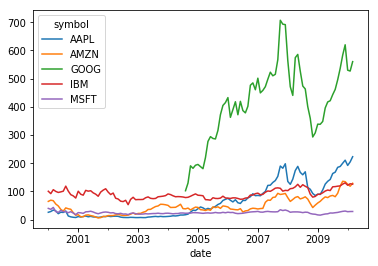

In [3]:
stocks.plot();

The result is a nice plot, but is just a static PNG.

Importing the ``pdvega`` module will add the ``vgplot`` attribute to pandas ``Series`` and ``DataFrame`` objects that produces a more dynamic plot:

In [4]:
# import adds the vgplot attribute to Series and DataFrames
import pdvega

# OPTIONALstores images as static png, reducing size of the notebook. requires selenium. 
pdvega.alt.renderers.enable('png')  

hasattr(pd.DataFrame, 'vgplot')

True

The ``vgplot`` method is designed to have mostly the same interface as the ``plot`` method:

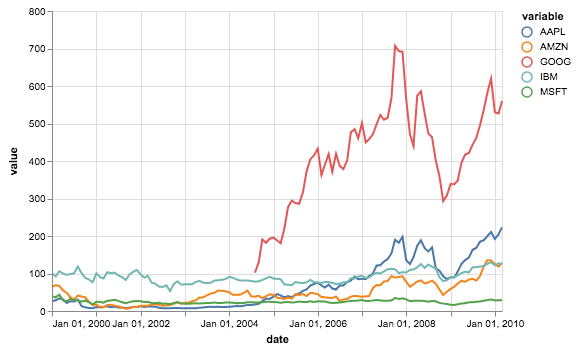

In [5]:
stocks.vgplot()

The result is an interactive plot; if you're running the notebook live, you should be able to pan and zoom the plot using your mouse or trackpad.

Let's explore a few types of plots that ``pdvega`` makes available:

## Line Plots

Above we saw that the default plot style is a line plot.
We can also specify the line plot explicitly using ``plot.line()`` or ``vgplot.line()``:

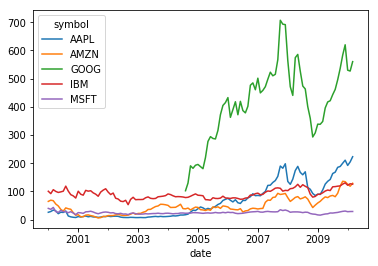

In [6]:
stocks.plot.line();

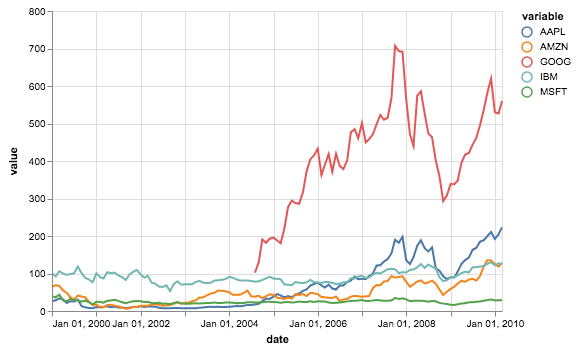

In [7]:
stocks.vgplot.line()

## Scatter Plots

Scatter plots are also supported; for this let's use the ``cars`` data:

In [8]:
cars = data('cars')
cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


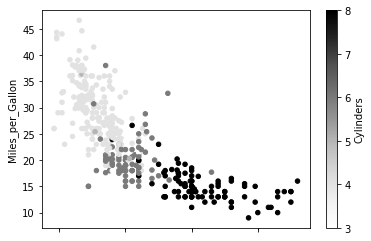

In [9]:
cars.plot.scatter(x='Horsepower', y='Miles_per_Gallon', c='Cylinders');

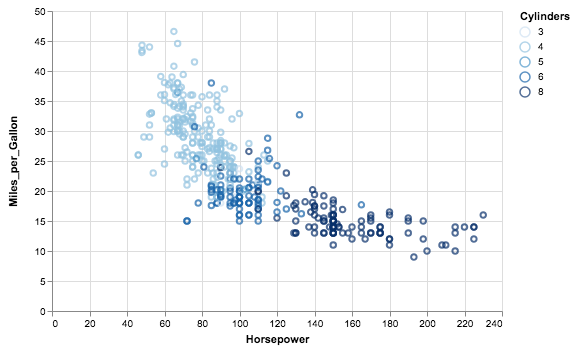

In [10]:
cars.vgplot.scatter(x='Horsepower', y='Miles_per_Gallon', c='Cylinders')

Notice that unlike matplotlib, pdvega recognizes that the ``Cylinders`` column consists of discrete, ordinal values, and chooses the legend accordingly.
For continuous values, a continuous legend is used:

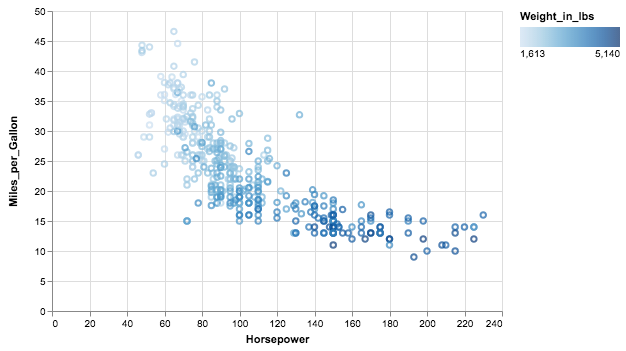

In [11]:
cars.vgplot.scatter(x='Horsepower', y='Miles_per_Gallon', c='Weight_in_lbs')

Both the size and the color of points can be specified, as well as the transparency:

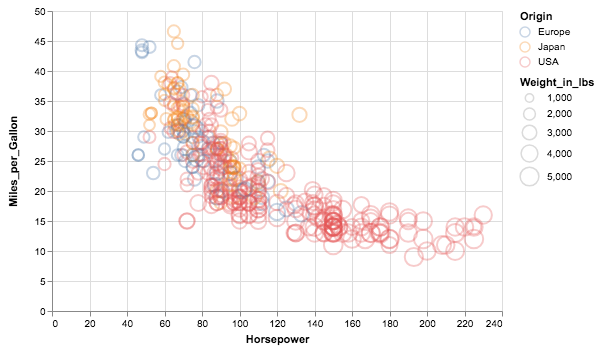

In [12]:
cars.vgplot.scatter(x='Horsepower', y='Miles_per_Gallon',
                    c='Origin', s='Weight_in_lbs', alpha=0.3)

## Bar Plots

Bar plots are supported with the ``bar`` and ``barh`` methods.
let's create some simple data to plot

In [13]:
rand = np.random.RandomState(42)
df = pd.DataFrame({'x': 0.5 + 0.5 * rand.rand(20),
                   'y': 0.7 + 0.5 * rand.rand(20)})

### Unstacked

The default bar plot type is unstacked; there is a slight difference between matplotlib and vega here: matplotlib puts the bars side-by-side, while Vega layers the unstacked bars on top of each other, making them transparent:

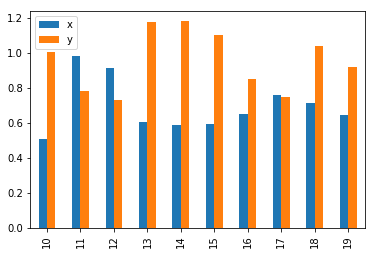

In [14]:
df.iloc[-10:].plot.bar();

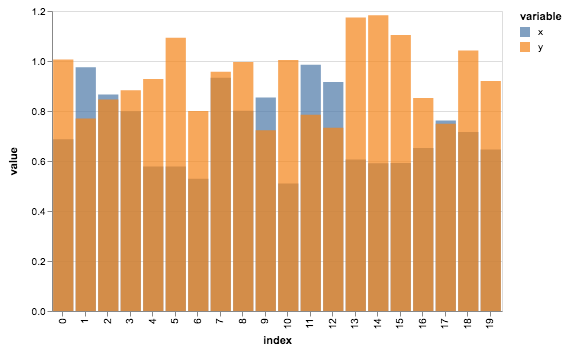

In [15]:
df.vgplot.bar()

### Stacked

It can be more useful to stack the bars instead:

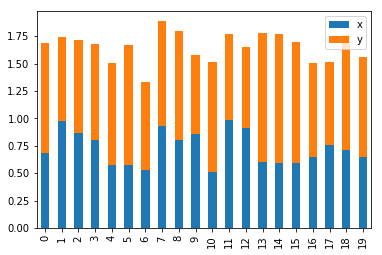

In [16]:
df.plot.bar(stacked=True);

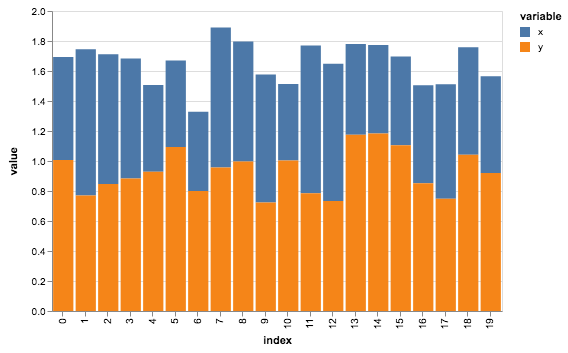

In [17]:
df.vgplot.bar(stacked=True)

### Horizontal bar

By changing ``bar`` to ``barh``, we get horizontal bar plots:

In [18]:
df10 = df.iloc[:10]

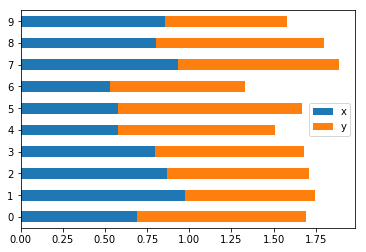

In [19]:
df10.plot.barh(stacked=True);

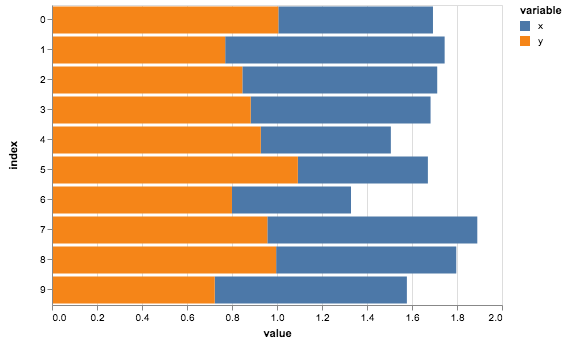

In [20]:
df10.vgplot.barh(stacked=True)

## Area Plots

Filled line plots become area plots, which are stacked by default:

In [21]:
df = pd.DataFrame({'x': 1 + np.random.rand(50),
                   'y': 1 + np.random.rand(50)})

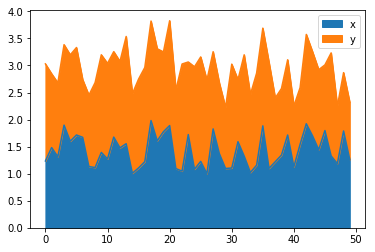

In [22]:
df.plot.area();

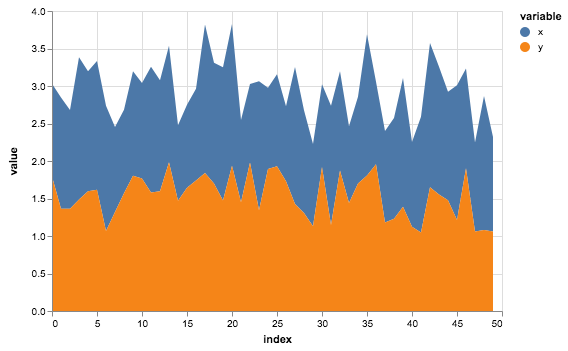

In [23]:
df.vgplot.area()

When unstacked, they become partially transparent for clarity:

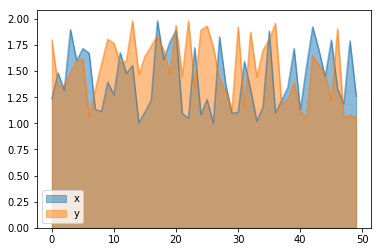

In [24]:
df.plot.area(stacked=False);

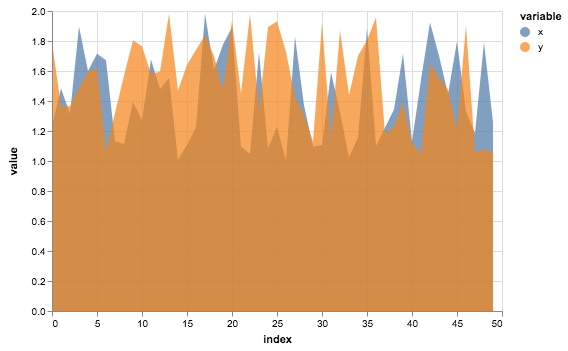

In [25]:
df.vgplot.area(stacked=False)

## Histograms

For exploring distributions of data, histograms are useful:

In [26]:
df = pd.DataFrame({'x': np.random.randn(1000),
                   'y': 1 + np.random.randn(1000)})

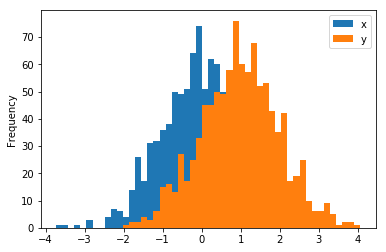

In [27]:
df.plot.hist(bins=50);

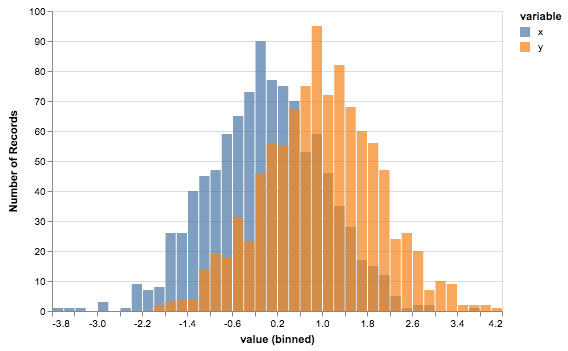

In [28]:
df.vgplot.hist(bins=50)

Vega supports different histogram types, including step plots:

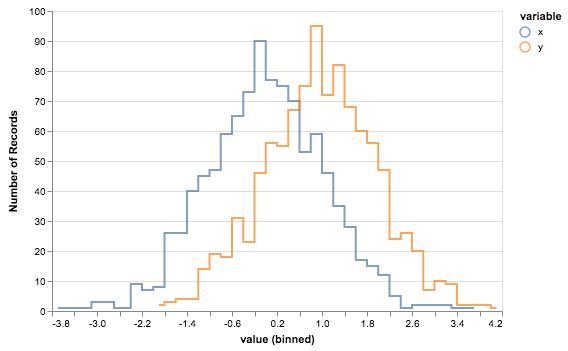

In [29]:
df.vgplot.hist(bins=50, histtype='step')

And filled step plots:

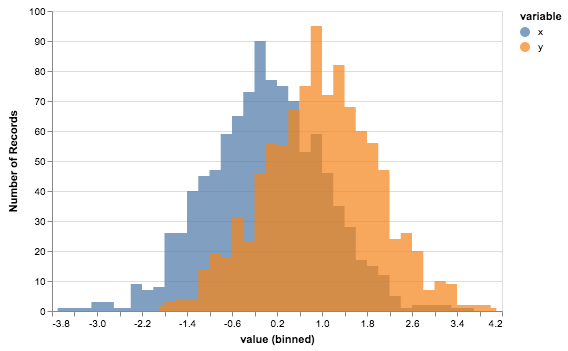

In [30]:
df.vgplot.hist(bins=50, histtype='stepfilled')

## KDE Plots

A more useful density estimator is a kernel density estimate, which can be plotted with the ``kde`` method:

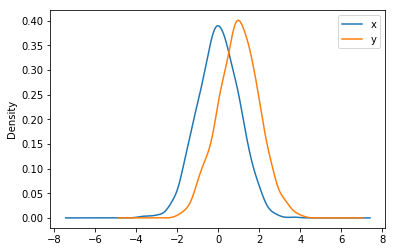

In [31]:
df.plot.kde();

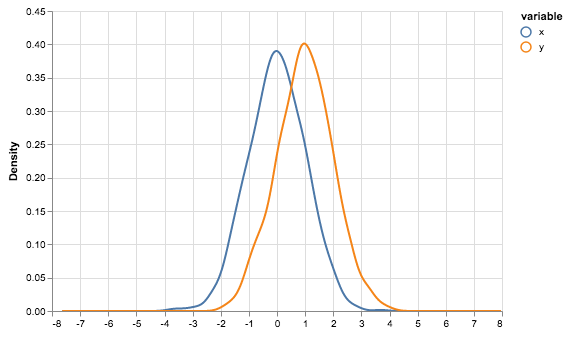

In [32]:
df.vgplot.kde()

## Heatmaps and Hexbin

For two-dimensional data, matplotlib provides a hexagonally-binned heatmapwith the ``hexbin`` function:

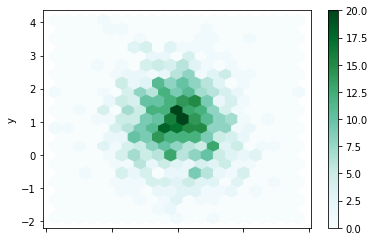

In [33]:
df.plot.hexbin(x='x', y='y', gridsize=20);

Unfortunately, Vega-Lite does not support hexagonal binning, but does support Cartesian-binned heatmaps:

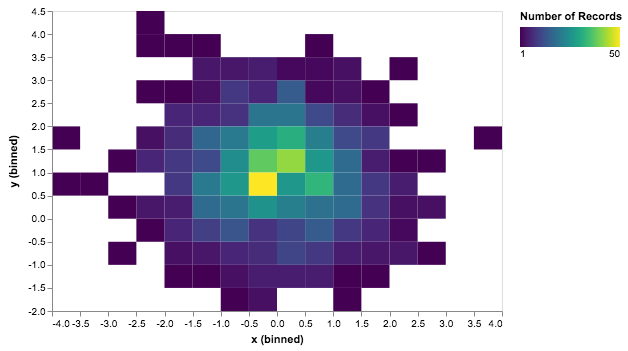

In [34]:
df.vgplot.heatmap(x='x', y='y', gridsize=20)

## Scatter Matrix

For higher-dimensional data, a matrix of scatterplots can be a useful way to explore data. Pandas provides this in the ``pd.plotting.scatter_matrix()`` function:

In [35]:
iris = data.iris()

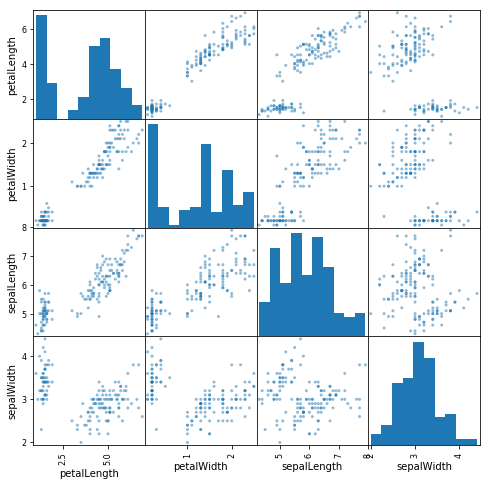

In [36]:
pd.plotting.scatter_matrix(iris, figsize=(8, 8));

pdvega provides this as well:

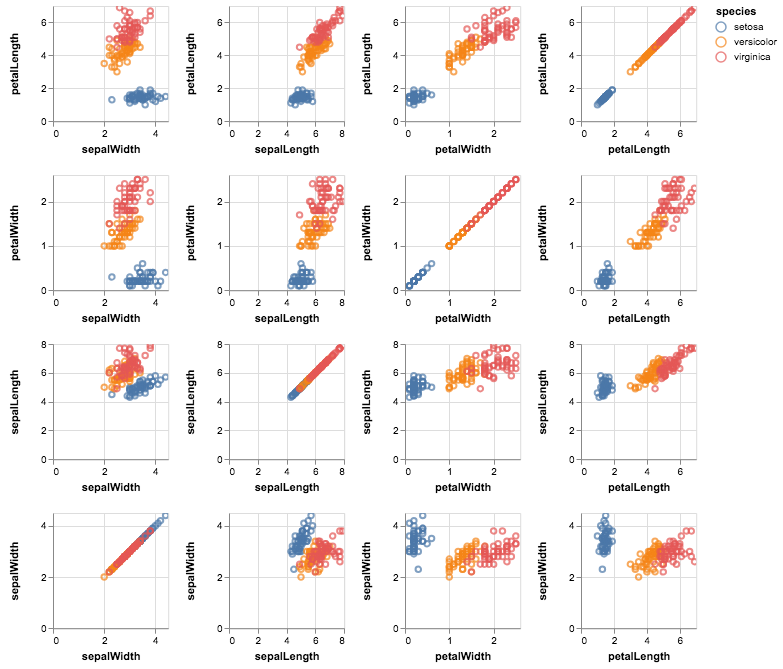

In [37]:
pdvega.plotting.scatter_matrix(iris, 'species', figsize=(8, 8))

In this case, the scatter matrix supports two types of interactions:

- clicking and dragging will pan and zoom the plots in a linked manner
- clicking and dragging while holding the SHIFT key will perform linked-brushing, highlighting selected points across the plot.

## Parallel Coordinates

Anotehr way to visualize higher-dimensional data is through a parallel coordinates plot:

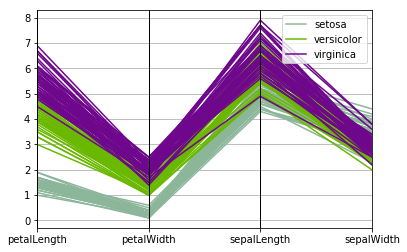

In [38]:
pd.plotting.parallel_coordinates(iris, 'species');

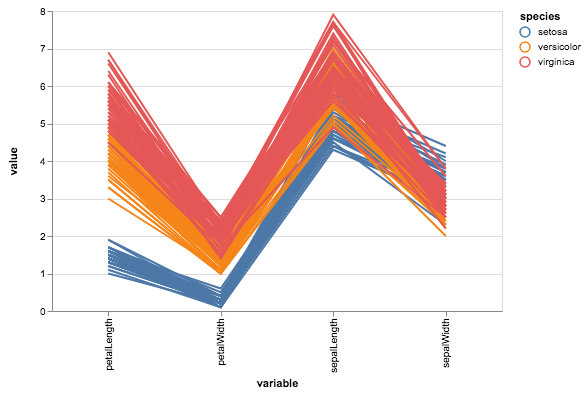

In [39]:
pdvega.plotting.parallel_coordinates(iris, 'species')

## Andrews Curves

Similar in spirit is the Andrews curve plot, which converts each datapoint into a smooth curve via a Fourier series:

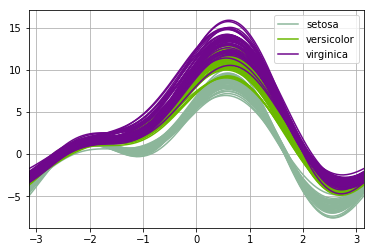

In [40]:
pd.plotting.andrews_curves(iris, 'species');

In [41]:
import altair as alt

code below is required to plot data with more than 5000 rows.

read more [here](https://altair-viz.github.io/user_guide/faq.html?highlight=number%20rows#disabling-maxrows)                 

In [42]:
# alt.data_transformers.enable('default', max_rows=None)  

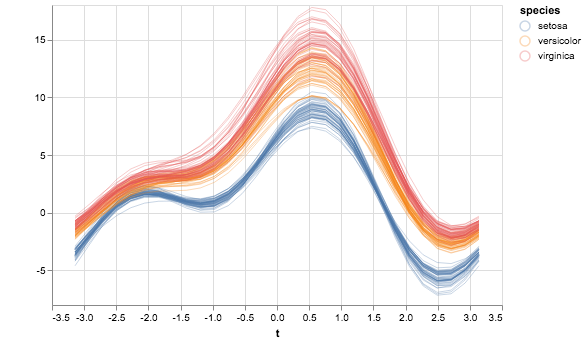

In [43]:
chart = pdvega.plotting.andrews_curves(iris, 'species', samples=30)
chart.mark_line(strokeWidth=1).encode(opacity=alt.value(0.3))

## Lag Plot

A lag plot is a way of exploring the temporal relationships within a time series, by plotting values separated by a constant lag.
For example, here is the 12-month lag plot of some tech stock prices between 1998 and 2010

In [44]:
stocks = data.stocks(pivoted=True)

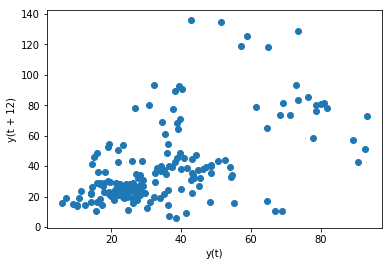

In [45]:
pd.plotting.lag_plot(stocks[['MSFT', 'AMZN']], lag=12);

Unlike matplotlib, ``pdvega`` automatically colors and labels points to make the relationships more clear:

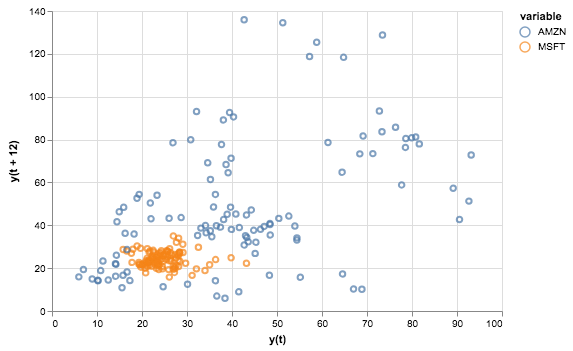

In [46]:
pdvega.plotting.lag_plot(stocks[['MSFT', 'AMZN']], lag=12)

This shows us that during 1998-2010, Amazon, a startup company, was quite volatile (its price any given month was very unpredictive of its price a year later) while Microsoft, and established tech giant, was much more stable.

## Learning More

Hopefully this whets your appetite for the types of plots you can make in Vega-Lite. For more information on the pdvega package, please see the documentation at http://altair-viz.github.io/pdvega/.